# SARIMAX MODEL for dublin bikes availability prediction

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df2019 = pd.read_csv('dublinbikes_20190101_20190401.csv' , parse_dates=['TIME'])

In [2]:
df2019

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2019-01-01 00:00:03,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501
1,1,2019-01-01 00:05:03,2019-01-01 00:00:14,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501
2,1,2019-01-01 00:10:02,2019-01-01 00:00:14,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501
3,1,2019-01-01 00:15:02,2019-01-01 00:10:24,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501
4,1,2019-01-01 00:20:01,2019-01-01 00:10:24,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501
...,...,...,...,...,...,...,...,...,...,...,...
2912989,115,2019-03-31 23:35:03,2019-03-31 23:32:32,KILLARNEY STREET,30,0,30,Open,Killarney Street,53.354843,-6.247579
2912990,115,2019-03-31 23:40:03,2019-03-31 23:32:32,KILLARNEY STREET,30,0,30,Open,Killarney Street,53.354843,-6.247579
2912991,115,2019-03-31 23:45:02,2019-03-31 23:42:42,KILLARNEY STREET,30,0,30,Open,Killarney Street,53.354843,-6.247579
2912992,115,2019-03-31 23:50:04,2019-03-31 23:42:42,KILLARNEY STREET,30,0,30,Open,Killarney Street,53.354843,-6.247579


The total available bikes in each station is combined for each 5 min interval

In [3]:
df_grouped = df2019.groupby(['TIME'],sort=False).sum().reset_index()
df_grouped

,TIME,STATION ID,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,LATITUDE,LONGITUDE
0,2019-01-01 00:00:03,6650,3654,2303,1290,6081.387343,-714.182209
1,2019-01-01 00:05:03,6650,3654,2305,1288,6081.387343,-714.182209
2,2019-01-01 00:10:02,6650,3654,2302,1291,6081.387343,-714.182209
3,2019-01-01 00:15:02,6650,3654,2304,1289,6081.387343,-714.182209
4,2019-01-01 00:20:01,6650,3654,2311,1282,6081.387343,-714.182209
...,...,...,...,...,...,...,...
25714,2019-03-31 23:35:03,6649,3608,2287,1320,6028.046416,-707.919708
25715,2019-03-31 23:40:03,6649,3608,2278,1329,6028.046416,-707.919708
25716,2019-03-31 23:45:02,6649,3608,2270,1337,6028.046416,-707.919708
25717,2019-03-31 23:50:04,6649,3608,2266,1341,6028.046416,-707.919708


In [4]:
df_grouped = df_grouped.loc[:,['TIME','AVAILABLE BIKES']]
df_grouped.head()

,TIME,AVAILABLE BIKES
0,2019-01-01 00:00:03,1290
1,2019-01-01 00:05:03,1288
2,2019-01-01 00:10:02,1291
3,2019-01-01 00:15:02,1289
4,2019-01-01 00:20:01,1282


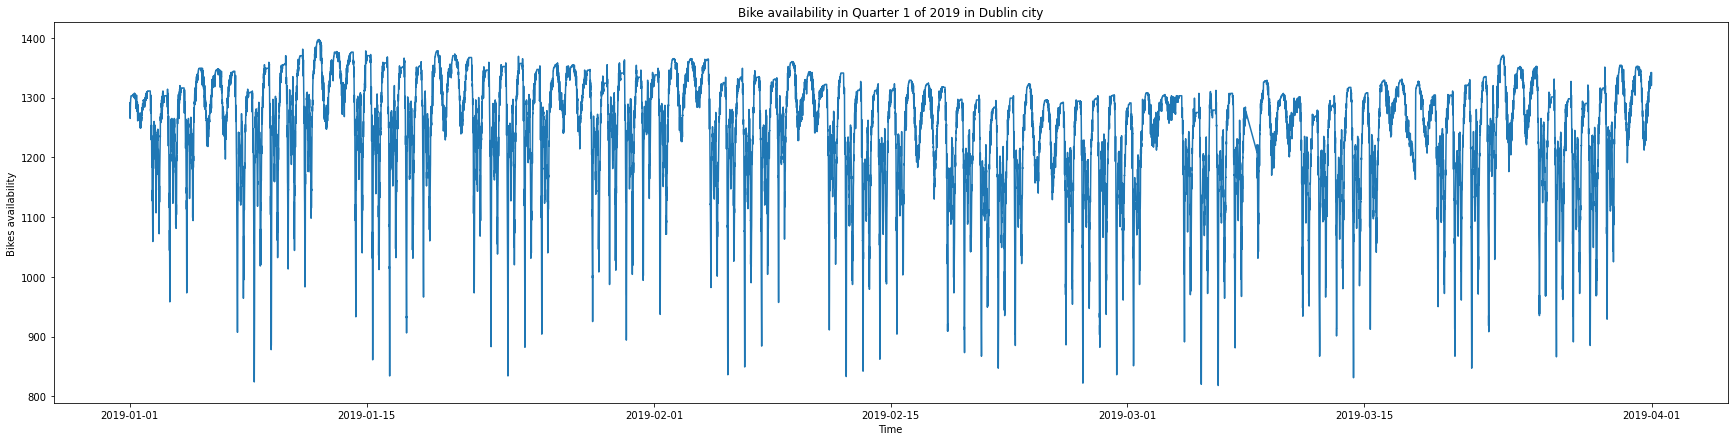

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,7))
x = df_grouped['TIME']
y = df_grouped['AVAILABLE BIKES']
plt.ylabel('Bikes availability')
plt.xlabel('Time')
plt.title('Bike availability in Quarter 1 of 2019 in Dublin city')
plt.plot(x,y)
plt.show()

Observing the plot we can identify that there is weekly seasonality in our data. Data also looks stationary. To confirm this we use **Augmented Dickey Fuller (ADF) test**

In [6]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(bikesAvailable):
    result=adfuller(bikesAvailable)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_grouped['AVAILABLE BIKES'])

ADF Test Statistic : -13.055255369986153
p-value : 2.1013621001872033e-24
#Lags Used : 48
Number of Observations : 25670
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


The data is stationary. Thus the order of differencing, d = 0

Now we decompose our data to analyze the trend and seasonality

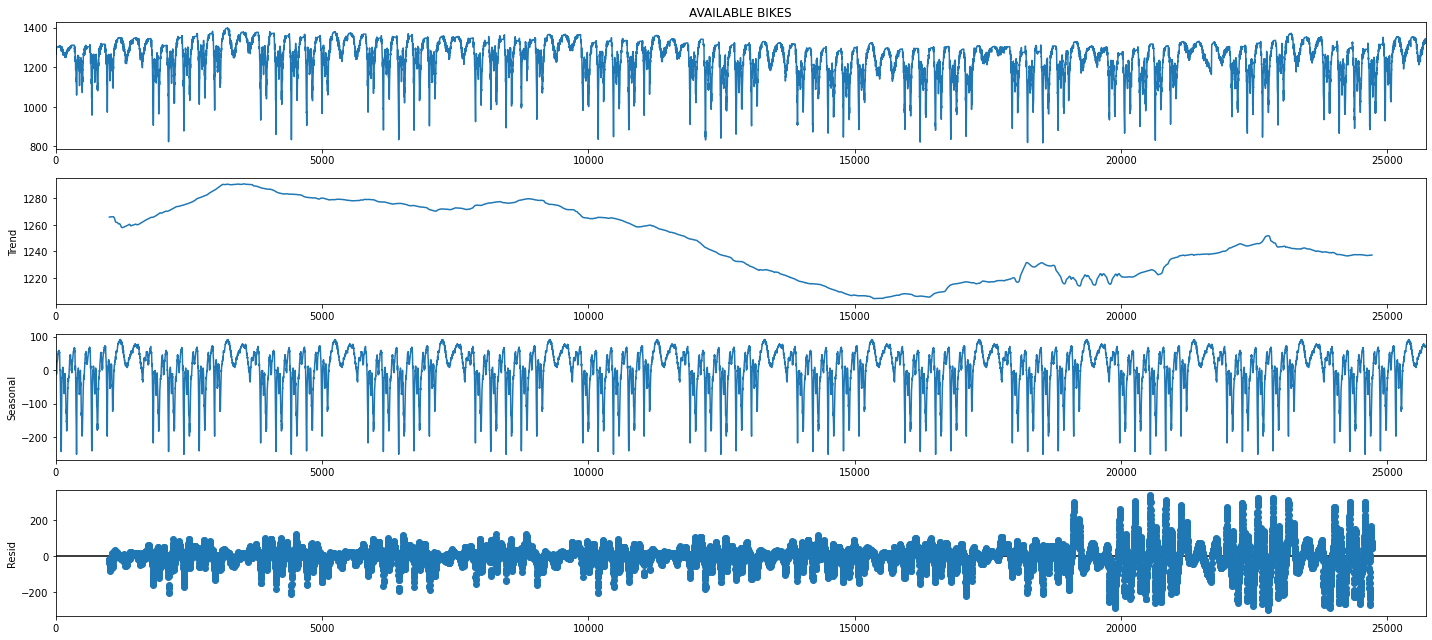

In [7]:
from pylab import rcParams
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_grouped['AVAILABLE BIKES'], 
                                          model='additive', 
                                          period=2016)  # weekly


old_rcParams = rcParams['figure.figsize']; rcParams['figure.figsize'] = 20, 9      
decomposition.plot()
plt.show()
rcParams['figure.figsize'] = old_rcParams 

Now we plot the autocorrelation and partial correlation plot to identify the **AR term (p) and MA term (q)**

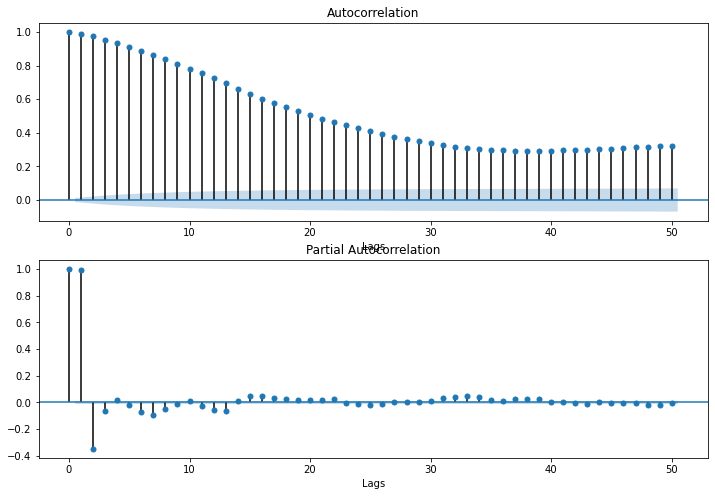

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('Lags')
fig = sm.graphics.tsa.plot_acf(df_grouped['AVAILABLE BIKES'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
ax2.set_xlabel('Lags')
fig = sm.graphics.tsa.plot_pacf(df_grouped['AVAILABLE BIKES'].dropna(),lags=50,ax=ax2)

We have only positive values for autocorrelation plot including for lag =0, thus we take **q = 0**. For the partial autocorrelation plot, the significance limit is crossed after lag 1, thus we take **p =1**

Train data and test data is split based on day of week. We split such that both train data and test data start on same week day. This is to ensure that the seasonality is perfectly captured

In [9]:
df_train, df_test = df_grouped[0:21977], df_grouped[21977:len(df_grouped)]

print('Observations: %d' % (len(df_grouped)))
print('Training Observations: %d' % (len(df_train)))
print('Testing Observations: %d' % (len(df_test)))

Observations: 25719
Training Observations: 21977
Testing Observations: 3742


To fit our Seasonal ARIMA model, the parameter m for seasonal order in our case is **2016**. We have data for every 5 minutes. Thus one week of data = 12x24x7 = 2016.
Since we have a large value for m, fitting a SARIMAX model is non-feasible. Thus the following model won't help. 

### Not Feasible

So we deseasonalize our data and apply ARIMA model to the trend and add the seasonality back after prediction

## Deseasonalize and then modeling

In [10]:
decomposition = sm.tsa.seasonal_decompose(df_train['AVAILABLE BIKES'], 
                                          model='additive', 
                                          period=2016)  # weekly

seasonality = decomposition.seasonal[:]
trend = decomposition.trend

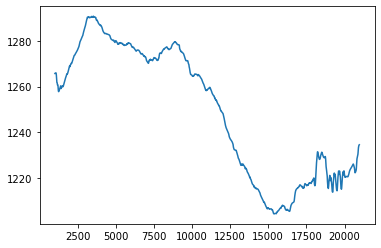

In [11]:
#To analyze the trend component
trend.plot();

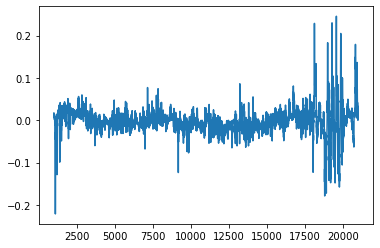

In [12]:
#Checking if differncing will make it stationary
trend.diff().plot();

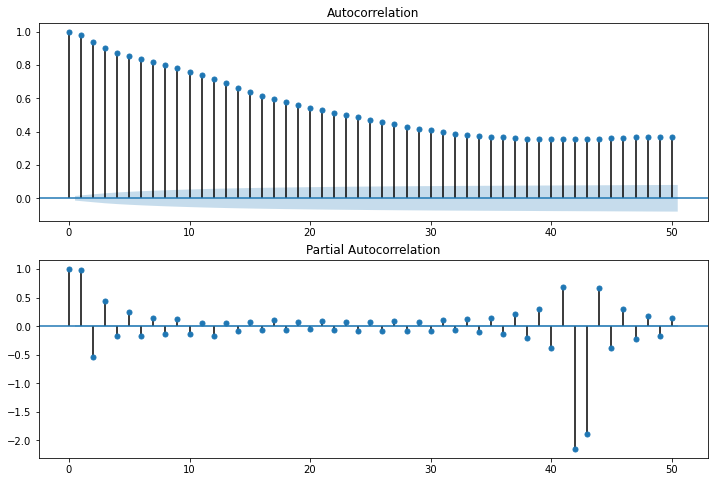

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend.diff().dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend.diff().dropna(),lags=50,ax=ax2)

To find the best parameters, we iterate over some values and find the AIC value. AIC quantifies both goodness of fit and simplicity of model into single statistic. Lower the AIC, the better model

In [14]:
import itertools
warnings.filterwarnings("ignore")
p  = q = range(0, 5)
d = range(2)

pdq = list(itertools.product(p, d, q))
print('Fitting {} combinations:\n'.format(len(pdq)))
aic_values = list()
pdq_order = list()
for param in pdq:
    try:
        mod = sm.tsa.SARIMAX(trend, exog=None, order=param)
        results = mod.fit()
        aic_values.append(results.aic)
        pdq_order.append(param)
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        aic_values.append(np.NAN)
        pdq_order.append(param)
        print('ARIMA{} - AIC:{}'.format(param, np.NAN))
        continue
        
best_params = pdq_order[aic_values.index(min(aic_values))]
print('\nBest Params:\nARIMA{} - AIC:{}'.format(best_params, min(aic_values)))

Fitting 50 combinations:

ARIMA(0, 0, 0) - AIC:341312.4357475379
ARIMA(0, 0, 1) - AIC:313653.0706010481
ARIMA(0, 0, 2) - AIC:286025.4604509882
ARIMA(0, 0, 3) - AIC:258973.57185440217
ARIMA(0, 0, 4) - AIC:319715.5355436809
ARIMA(0, 1, 0) - AIC:-85088.81259020545
ARIMA(0, 1, 1) - AIC:-112372.96933700284
ARIMA(0, 1, 2) - AIC:-133486.23118829433
ARIMA(0, 1, 3) - AIC:-145777.9493886601
ARIMA(0, 1, 4) - AIC:-151881.1090213368
ARIMA(1, 0, 0) - AIC:-80795.85968760803
ARIMA(1, 0, 1) - AIC:-110667.87884840445
ARIMA(1, 0, 2) - AIC:-129878.69211679298
ARIMA(1, 0, 3) - AIC:-142695.4848703925
ARIMA(1, 0, 4) - AIC:-149775.30097794774
ARIMA(1, 1, 0) - AIC:-150153.05546809363
ARIMA(1, 1, 1) - AIC:-165659.98415168328
ARIMA(1, 1, 2) - AIC:-164279.84431631898
ARIMA(1, 1, 3) - AIC:-164411.76283054642
ARIMA(1, 1, 4) - AIC:-165919.37621625373
ARIMA(2, 0, 0) - AIC:-150107.71830754203
ARIMA(2, 0, 1) - AIC:-165580.94615360477
ARIMA(2, 0, 2) - AIC:-163938.19201649888
ARIMA(2, 0, 3) - AIC:-165807.57180151434
ARIM

In [15]:
model = sm.tsa.SARIMAX(trend, exog=None, order=(1,1,4))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                21977
Model:               SARIMAX(1, 1, 4)   Log Likelihood               82965.688
Date:                Tue, 22 Dec 2020   AIC                        -165919.376
Time:                        13:19:37   BIC                        -165871.390
Sample:                             0   HQIC                       -165903.748
                              - 21977                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9759      0.001    809.440      0.000       0.974       0.978
ma.L1          1.0957      0.005    227.737      0.000       1.086       1.105
ma.L2          0.0554      0.007      7.905      0.0

We predict for the test data and also an additional 2000 timestamps

In [16]:
trend_predictions = model_fit.predict(start=df_test.index[0], end=df_test.index[-1]+2000).reset_index(drop=True)
#adding the seasonality back
seasonal_predictions = seasonality[0:len(trend_predictions)].reset_index(drop=True)
centered_predictions = trend_predictions + seasonal_predictions
full_predictions = centered_predictions
full_predictions.index = range(df_test.index[0], df_test.index[-1]+2001, 1)

## Prediction Results

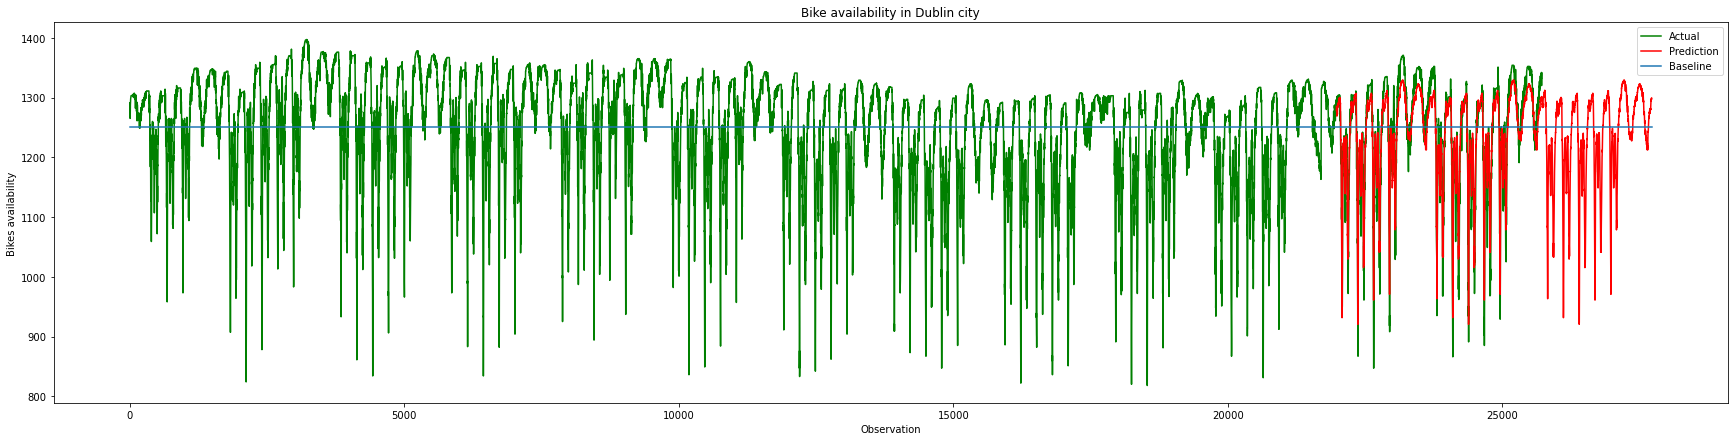

In [17]:
#Plotting both train, test, predictions
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(df_grouped['AVAILABLE BIKES'], color = "green")
plt.plot(full_predictions, color = "red")
x_value = [0,full_predictions.index[-1]]
mean = df_train['AVAILABLE BIKES'].mean()
y_value = [mean,mean]
plt.plot(x_value,y_value)
plt.ylabel('Bikes availability')
plt.xlabel('Observation')
plt.title('Bike availability in Dublin city')
plt.legend(['Actual','Prediction','Baseline'])
plt.show()

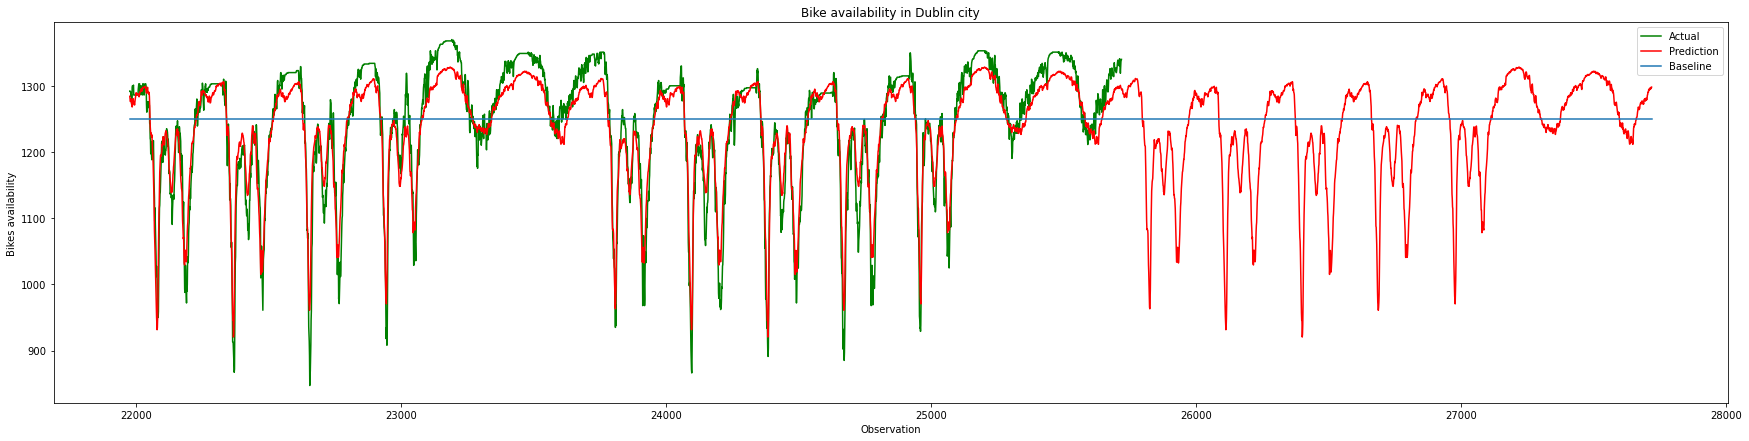

In [18]:
#Plotting test, predictions
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(df_test['AVAILABLE BIKES'], color = "green")
plt.plot(full_predictions, color = "red")
plt.ylabel('Bikes availability')
plt.xlabel('Observation')
x_value = [full_predictions.index[0],full_predictions.index[-1]]
plt.plot(x_value,y_value)
plt.title('Bike availability in Dublin city')
plt.legend(['Actual','Prediction','Baseline'])
plt.show()

We check the prediction accuracy using **Mean Absolute Error (MAE)** and **Mean Absolute Percentage Error (MAPE)**

In [19]:
def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)))

In [20]:
mae_baseline= mean_absolute_error(df_test['AVAILABLE BIKES'], [mean] * len(df_test)) 
print("The mean absolute error of baseline is: ", mae_baseline)
mae_model = mean_absolute_error(df_test['AVAILABLE BIKES'], full_predictions[:len(df_test)])
print("The mean absolute error of SARIMAX model is: ", mae_model)

The mean absolute error of baseline is:  74.1229042791858
The mean absolute error of SARIMAX model is:  24.389673780283513


In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
mape_baseline= mean_absolute_percentage_error(df_test['AVAILABLE BIKES'], [mean] * len(df_test)) 
print("The mean absolute percentage error of baseline is: ", mape_baseline)
mape_model = mean_absolute_percentage_error(df_test['AVAILABLE BIKES'], full_predictions[:len(df_test)])
print("The mean absolute percentage error of SARIMAX model is: ", mape_model)

The mean absolute error of baseline is:  6.3590794930606975
The mean absolute error of SARIMAX model is:  2.0302066363495963


# Predicting availability of single station (Blessington Street)

In [23]:
df_blessington = df2019[df2019['NAME']=='BLESSINGTON STREET'].reset_index(drop=True)
df_blessington

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2019-01-01 00:00:03,2018-12-31 23:55:41,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,-6.26814
1,2,2019-01-01 00:05:03,2018-12-31 23:55:41,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,-6.26814
2,2,2019-01-01 00:10:02,2019-01-01 00:05:50,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,-6.26814
3,2,2019-01-01 00:15:02,2019-01-01 00:05:50,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,-6.26814
4,2,2019-01-01 00:20:01,2019-01-01 00:15:59,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,-6.26814
...,...,...,...,...,...,...,...,...,...,...,...
25714,2,2019-03-31 23:35:03,2019-03-31 23:31:47,BLESSINGTON STREET,20,14,6,Open,Blessington Street,53.35677,-6.26814
25715,2,2019-03-31 23:40:03,2019-03-31 23:31:47,BLESSINGTON STREET,20,14,6,Open,Blessington Street,53.35677,-6.26814
25716,2,2019-03-31 23:45:02,2019-03-31 23:41:56,BLESSINGTON STREET,20,14,6,Open,Blessington Street,53.35677,-6.26814
25717,2,2019-03-31 23:50:04,2019-03-31 23:41:56,BLESSINGTON STREET,20,14,6,Open,Blessington Street,53.35677,-6.26814


In [24]:
df_blessington = df_blessington.loc[:,['TIME','AVAILABLE BIKES']]
df_blessington

,TIME,AVAILABLE BIKES
0,2019-01-01 00:00:03,1
1,2019-01-01 00:05:03,1
2,2019-01-01 00:10:02,1
3,2019-01-01 00:15:02,1
4,2019-01-01 00:20:01,1
...,...,...
25714,2019-03-31 23:35:03,6
25715,2019-03-31 23:40:03,6
25716,2019-03-31 23:45:02,6
25717,2019-03-31 23:50:04,6


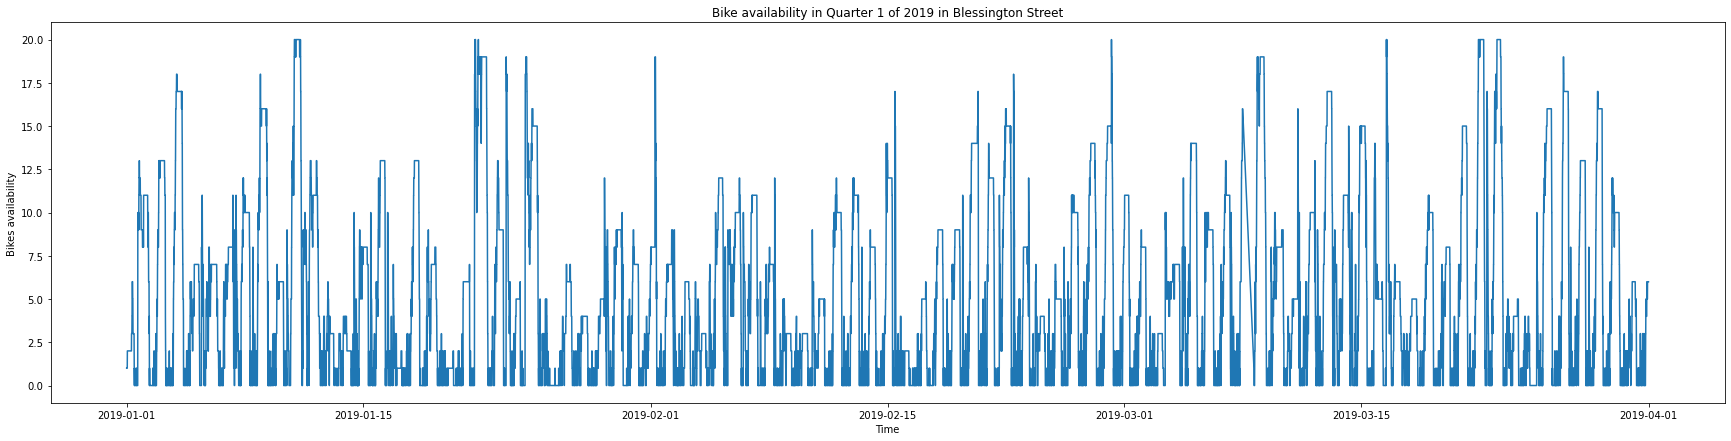

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,7))
x = df_blessington['TIME']
y = df_blessington['AVAILABLE BIKES']
plt.ylabel('Bikes availability')
plt.xlabel('Time')
plt.title('Bike availability in Quarter 1 of 2019 in Blessington Street')
plt.plot(x,y)
plt.show()

In [26]:
adfuller_test(df_blessington['AVAILABLE BIKES'])

ADF Test Statistic : -13.190270845782116
p-value : 1.1478715373557787e-24
#Lags Used : 13
Number of Observations : 25705
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


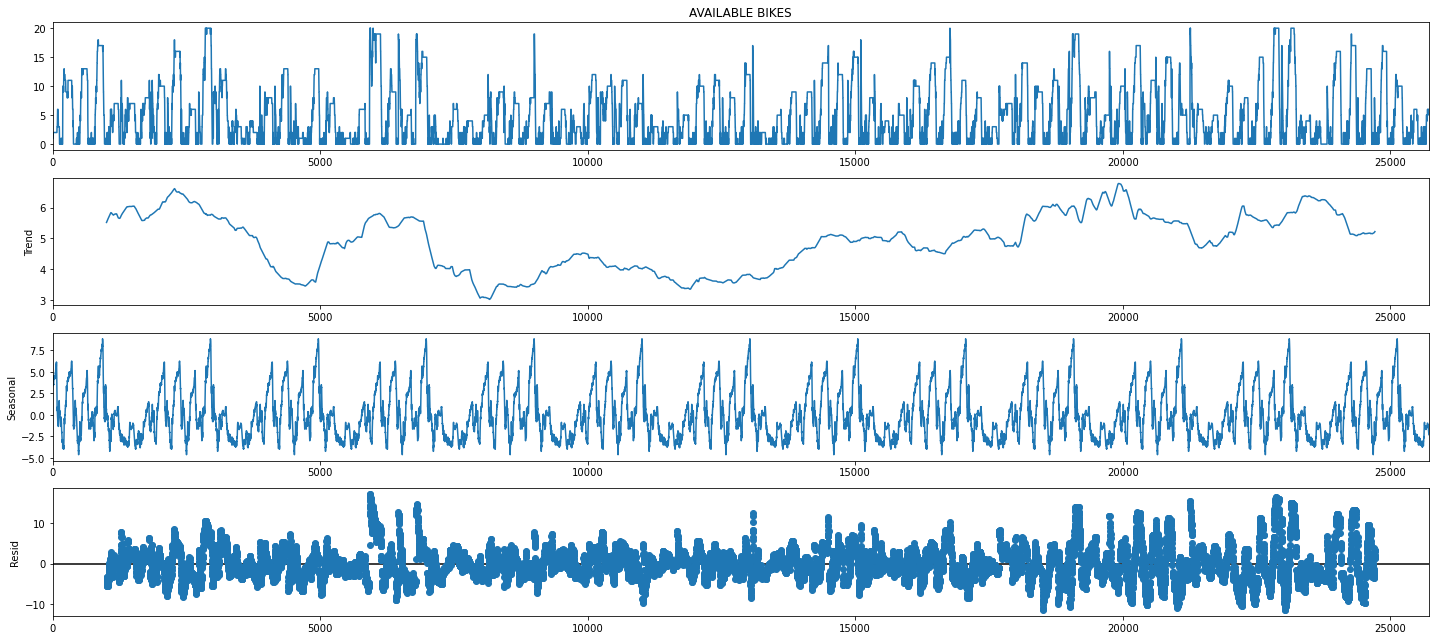

In [27]:
decomposition = sm.tsa.seasonal_decompose(df_blessington['AVAILABLE BIKES'], 
                                          model='additive', 
                                          period=2016)  # weekly


old_rcParams = rcParams['figure.figsize']; rcParams['figure.figsize'] = 20, 9      
decomposition.plot()
plt.show()
rcParams['figure.figsize'] = old_rcParams 

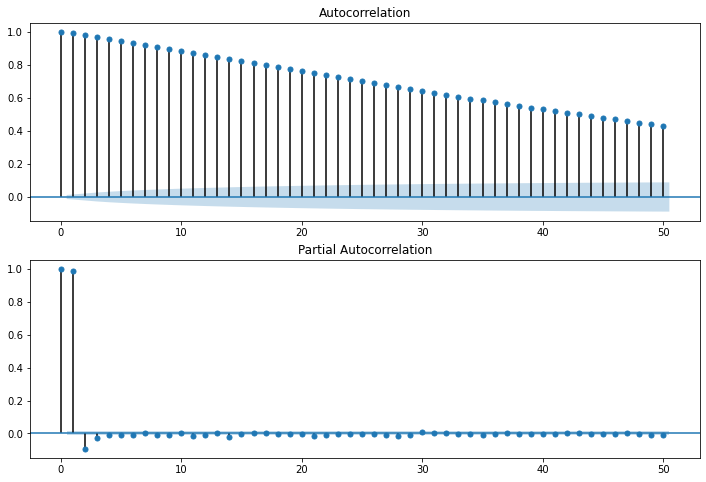

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_blessington['AVAILABLE BIKES'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_blessington['AVAILABLE BIKES'].dropna(),lags=50,ax=ax2)

In [29]:
df_train, df_test = df_blessington[0:21977], df_blessington[21977:len(df_blessington)]

print('Observations: %d' % (len(df_blessington)))
print('Training Observations: %d' % (len(df_train)))
print('Testing Observations: %d' % (len(df_test)))

Observations: 25719
Training Observations: 21977
Testing Observations: 3742


In [30]:
decomposition = sm.tsa.seasonal_decompose(df_train['AVAILABLE BIKES'], 
                                          model='additive', 
                                          period=2016)  # weekly

seasonality = decomposition.seasonal[:]
trend = decomposition.trend

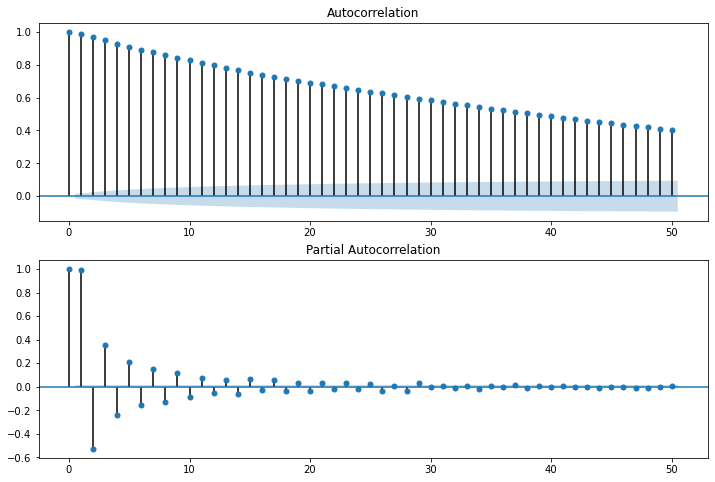

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend.diff().dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend.diff().dropna(),lags=50,ax=ax2)

In [32]:
p  = q = range(0, 5)
d = range(2)

pdq = list(itertools.product(p, d, q))

print('Fitting {} combinations:\n'.format(len(pdq)))
aic_values = list()
pdq_order = list()
for param in pdq:
    try:
        mod = sm.tsa.SARIMAX(trend, exog=None, order=param)
        results = mod.fit()
        aic_values.append(results.aic)
        pdq_order.append(param)
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        aic_values.append(np.NAN)
        pdq_order.append(param)
        print('ARIMA{} - AIC:{}'.format(param, np.NAN))
        continue
        
best_params = pdq_order[aic_values.index(min(aic_values))]
print('\nBest Params:\nARIMA{} - AIC:{}'.format(best_params, min(aic_values)))

Fitting 50 combinations:

ARIMA(0, 0, 0) - AIC:119921.24385394271
ARIMA(0, 0, 1) - AIC:92263.51326316736
ARIMA(0, 0, 2) - AIC:64624.67160398281
ARIMA(0, 0, 3) - AIC:37059.35547533387
ARIMA(0, 0, 4) - AIC:10237.560013276861
ARIMA(0, 1, 0) - AIC:-181873.97766660355
ARIMA(0, 1, 1) - AIC:-209075.46047296535
ARIMA(0, 1, 2) - AIC:-230894.02616945002
ARIMA(0, 1, 3) - AIC:-241328.3509782643
ARIMA(0, 1, 4) - AIC:-246467.19523706922
ARIMA(1, 0, 0) - AIC:-181881.18178612663
ARIMA(1, 0, 1) - AIC:-209079.7736156855
ARIMA(1, 0, 2) - AIC:-227574.4197212856
ARIMA(1, 0, 3) - AIC:-241330.69080282573
ARIMA(1, 0, 4) - AIC:-246203.4104870872
ARIMA(1, 1, 0) - AIC:-260057.87868669865
ARIMA(1, 1, 1) - AIC:-271686.6862107381
ARIMA(1, 1, 2) - AIC:-273176.41569225985
ARIMA(1, 1, 3) - AIC:-273825.9824574049
ARIMA(1, 1, 4) - AIC:-259949.30888884404
ARIMA(2, 0, 0) - AIC:-260065.5510836798
ARIMA(2, 0, 1) - AIC:-269154.9535804377
ARIMA(2, 0, 2) - AIC:-272865.45408177807
ARIMA(2, 0, 3) - AIC:-273689.3170704483
ARIMA(2

In [33]:
model = sm.tsa.SARIMAX(trend, exog=None, order=(4,1,4))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                21977
Model:               SARIMAX(4, 1, 4)   Log Likelihood              137098.632
Date:                Tue, 22 Dec 2020   AIC                        -274179.263
Time:                        13:28:26   BIC                        -274107.284
Sample:                             0   HQIC                       -274155.821
                              - 21977                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9349      0.001   1373.352      0.000       1.932       1.938
ar.L2         -1.5932      0.001  -1261.476      0.000      -1.596      -1.591
ar.L3          1.0852      0.001   1354.717      0.0

In [34]:
trend_predictions = model_fit.predict(start=df_test.index[0], end=df_test.index[-1]+2000).reset_index(drop=True)
seasonal_predictions = seasonality[0:len(trend_predictions)].reset_index(drop=True)
centered_predictions = trend_predictions + seasonal_predictions
full_predictions = centered_predictions
full_predictions.index = range(df_test.index[0], df_test.index[-1]+2001, 1)

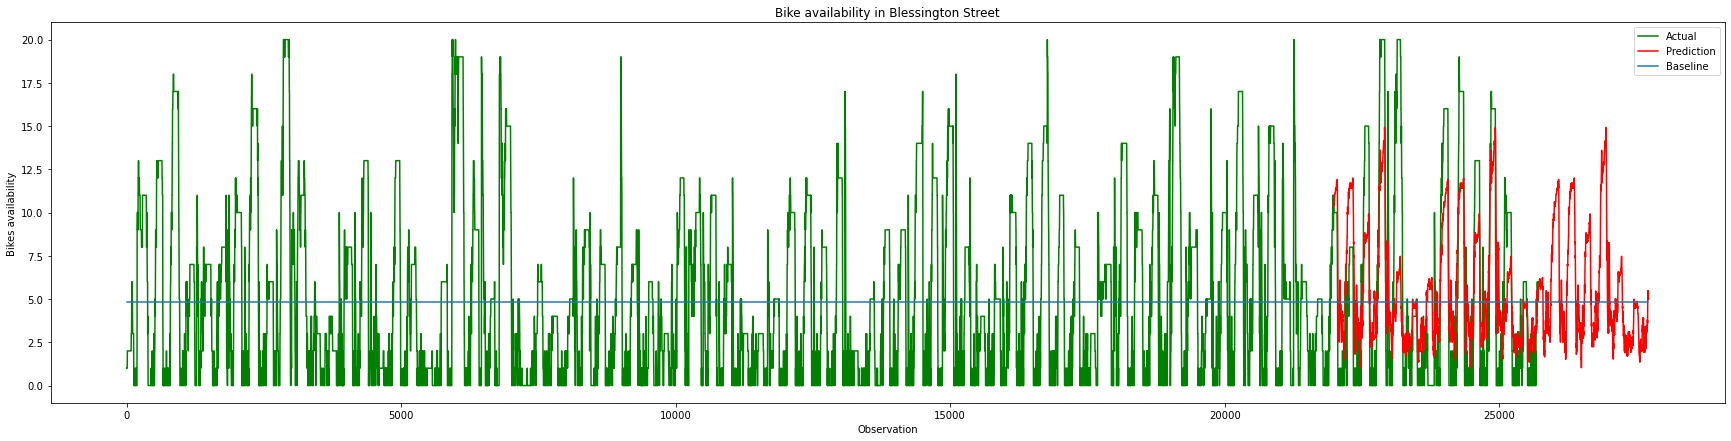

In [35]:
#Plotting both train, test, predictions
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(df_blessington['AVAILABLE BIKES'], color = "green")
plt.plot(full_predictions, color = "red")
x_value = [0,full_predictions.index[-1]]
mean = df_train['AVAILABLE BIKES'].mean()
y_value = [mean,mean]
plt.plot(x_value,y_value)
plt.ylabel('Bikes availability')
plt.xlabel('Observation')
plt.title('Bike availability in Blessington Street')
plt.legend(['Actual','Prediction','Baseline'])
plt.show()

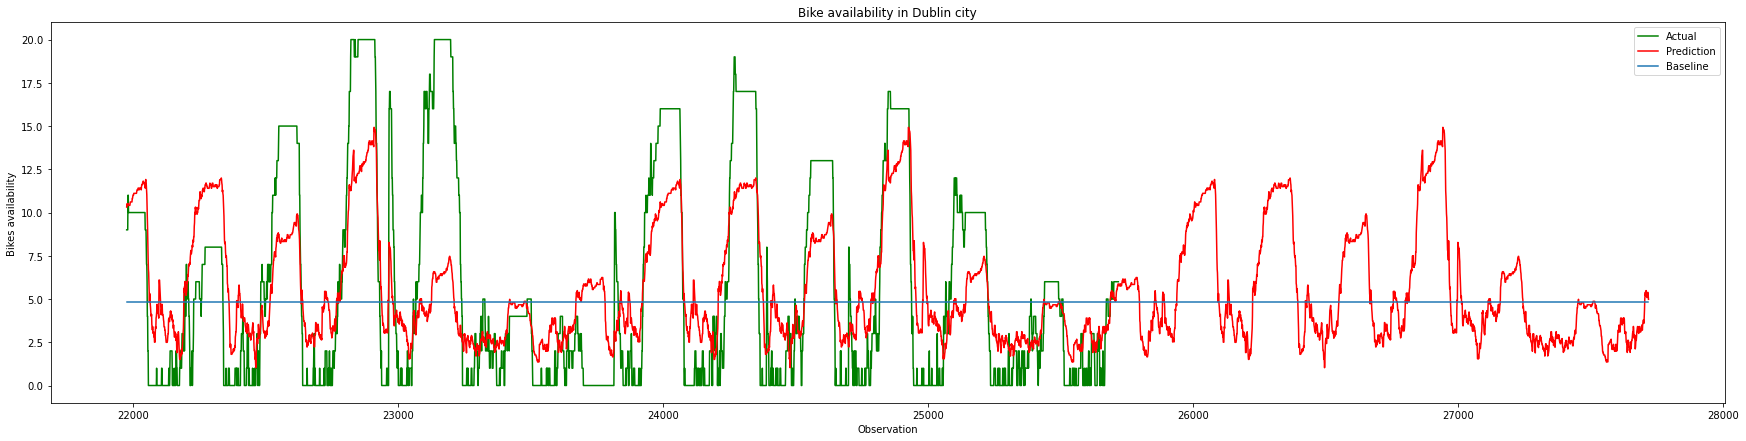

In [36]:
#Plotting test, predictions
fig, ax = plt.subplots(figsize=(30,7))
plt.plot(df_test['AVAILABLE BIKES'], color = "green")
plt.plot(full_predictions, color = "red")
plt.ylabel('Bikes availability')
plt.xlabel('Observation')
x_value = [full_predictions.index[0],full_predictions.index[-1]]
plt.plot(x_value,y_value)
plt.title('Bike availability in Dublin city')
plt.legend(['Actual','Prediction','Baseline'])
plt.show()

In [37]:
mae_baseline= mean_absolute_error(df_test['AVAILABLE BIKES'], [mean] * len(df_test)) 
print("The mean absolute error of baseline is: ", mae_baseline)
mae_model = mean_absolute_error(df_test['AVAILABLE BIKES'], full_predictions[:len(df_test)])
print("The mean absolute error of SARIMAX model is: ", mae_model)

The mean absolute error of baseline is:  5.1028784477975835
The mean absolute error of SARIMAX model is:  3.376236698669163


In [38]:
mape_baseline= mean_absolute_percentage_error(df_test['AVAILABLE BIKES'], [mean] * len(df_test)) 
print("The mean absolute error of baseline is: ", mape_baseline)
mape_model = mean_absolute_percentage_error(df_test['AVAILABLE BIKES'], full_predictions[:len(df_test)])
print("The mean absolute error of SARIMAX model is: ", mape_model)

The mean absolute error of baseline is:  inf
The mean absolute error of SARIMAX model is:  inf
